C:\Users\s27753\AppData\Local\Temp\ipykernel_12452\1723653704.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.sort_values(by=["date"], inplace=True)


Epoch 1/20


C:\Users\s27753\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5558/5558 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0180 - val_loss: 0.0163
Epoch 2/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 3/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 4/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 5/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 6/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 7/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 8/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 9/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 10/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 11/20
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 12/20
5558/5558 ━━━━━━━━━━━━━━━━━━━

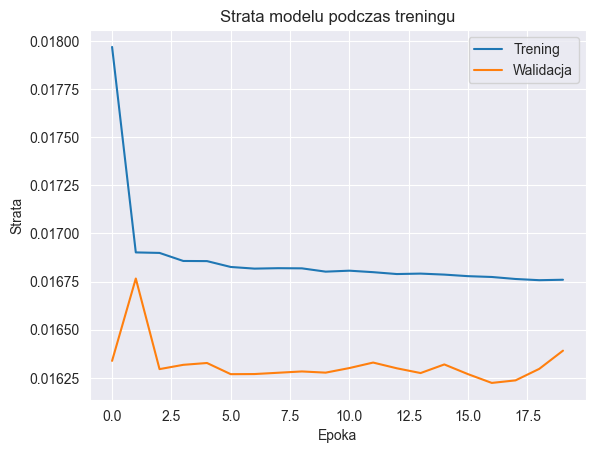

1390/1390 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step


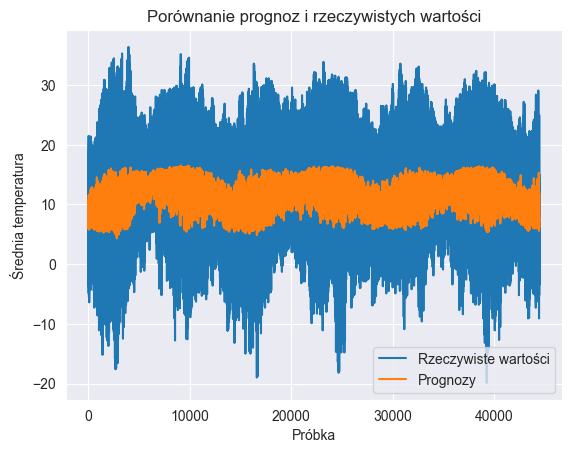

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prognozy na 5 dni do przodu (średnia temperatura):
[[7.659843 ]
 [8.294439 ]
 [8.174393 ]
 [7.9934835]
 [8.454722 ]]


In [10]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

In [11]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Wczytanie danych
df = pd.read_csv("european_capitals_history_clean.csv", parse_dates=["date"])

# Filtracja danych tylko dla jednego miasta (np. Warszawa)
df_city = df[df['city'] == 'Warszawa']

# Wybór kolumn: data, miasto, średnia temperatura
df_city = df[['date', 'city', 'tavg', 'prcp', 'wspd', 'pres']]

# Sortowanie danych według daty
df_city.sort_values(by=["date"], inplace=True)

# Funkcja do tworzenia sekwencji danych
def create_sequences(df, window=5):
    sequences = []
    labels = []
    for i in range(len(df) - window):
        seq = df.iloc[i:i+window]['tavg'].values
        label = df.iloc[i+window]['tavg']  # Temperatura na 6. dzień
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Przygotowanie sekwencji
sequences, labels = create_sequences(df_city, window=5)

# ---- POPRAWIONA NORMALIZACJA ----
scaler = MinMaxScaler()

# Skalujemy każdą temperaturę osobno
sequences_scaled = scaler.fit_transform(sequences.reshape(-1, 1)).reshape(sequences.shape)
labels_scaled = scaler.transform(labels.reshape(-1, 1))

# Reshape do LSTM: (sample, time_steps, features)
sequences_scaled = sequences_scaled.reshape((sequences_scaled.shape[0], sequences_scaled.shape[1], 1))

# Podział na dane treningowe i testowe
train_size = int(len(sequences_scaled) * 0.8)
X_train, X_test = sequences_scaled[:train_size], sequences_scaled[train_size:]
y_train, y_test = labels_scaled[:train_size], labels_scaled[train_size:]

# Budowanie modelu LSTM z ulepszeniami

model = Sequential()

# Pierwsza warstwa LSTM
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout dla zapobiegania przeuczeniu

# Druga warstwa LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout dla zapobiegania przeuczeniu

# Warstwa Dense
model.add(Dense(1))

# Kompilowanie modelu
model.compile(optimizer='adam', loss='mean_squared_error')

# Dodanie EarlyStopping - zatrzymanie, gdy nie ma poprawy na zbiorze walidacyjnym przez 5 epok
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Wizualizacja straty
plt.plot(history.history['loss'], label='Trening')
plt.plot(history.history['val_loss'], label='Walidacja')
plt.legend()
plt.title("Strata modelu podczas treningu")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.show()

# Predykcja
predictions = model.predict(X_test)

# ---- POPRAWNE ODWROCENIE NORMALIZACJI ----
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Wykres predykcji vs. realne wartości
plt.plot(y_test_rescaled, label='Rzeczywiste wartości')
plt.plot(predictions_rescaled, label='Prognozy')
plt.legend()
plt.title("Porównanie prognoz i rzeczywistych wartości")
plt.xlabel("Próbka")
plt.ylabel("Średnia temperatura")
plt.show()

# ---- PROGNOZA NA 5 DNI W PRZYSZŁOŚĆ ----
future_predictions = []
input_sequence = X_test[-1]  # (5, 1)

for _ in range(5):
    pred_scaled = model.predict(input_sequence.reshape(1, 5, 1))
    future_predictions.append(pred_scaled[0][0])

    # przesuwanie okna
    input_sequence = np.roll(input_sequence, -1)
    input_sequence[-1] = pred_scaled

# Odwrócenie normalizacji
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Prognozy na 5 dni do przodu (średnia temperatura):")
print(future_predictions_rescaled)


C:\Users\s27753\AppData\Local\Temp\ipykernel_12452\2522149552.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.sort_values(by=["date"], inplace=True)


Epoch 1/50


C:\Users\s27753\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5558/5558 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0186 - val_loss: 0.0165
Epoch 2/50
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0171 - val_loss: 0.0163
Epoch 3/50
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 4/50
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 5/50
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 6/50
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0168 - val_loss: 0.0162
Epoch 7/50
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 8/50
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0168 - val_loss: 0.0164
Epoch 9/50
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 10/50
5558/5558 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 11/50
3368/5558 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0167

KeyboardInterrupt: 

In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Wczytanie danych
df = pd.read_csv("european_capitals_history_clean.csv", parse_dates=["date"])

# Filtracja danych tylko dla jednego miasta (np. Warszawa)
df_city = df[df['city'] == 'Warszawa']

# Wybór kolumn: data, miasto, średnia temperatura
df_city = df[['date', 'city', 'tavg', 'prcp', 'wspd', 'pres']]

# Sortowanie danych według daty
df_city.sort_values(by=["date"], inplace=True)

# Funkcja do tworzenia sekwencji danych
def create_sequences(df, window=5):
    sequences = []
    labels = []
    for i in range(len(df) - window):
        seq = df.iloc[i:i+window]['tavg'].values
        label = df.iloc[i+window]['tavg']  # Temperatura na 6. dzień
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Przygotowanie sekwencji
sequences, labels = create_sequences(df_city, window=5)

# ---- POPRAWIONA NORMALIZACJA ----
scaler = MinMaxScaler()

# Skalujemy każdą temperaturę osobno
sequences_scaled = scaler.fit_transform(sequences.reshape(-1, 1)).reshape(sequences.shape)
labels_scaled = scaler.transform(labels.reshape(-1, 1))

# Reshape do LSTM: (sample, time_steps, features)
sequences_scaled = sequences_scaled.reshape((sequences_scaled.shape[0], sequences_scaled.shape[1], 1))

# Podział na dane treningowe i testowe
train_size = int(len(sequences_scaled) * 0.8)
X_train, X_test = sequences_scaled[:train_size], sequences_scaled[train_size:]
y_train, y_test = labels_scaled[:train_size], labels_scaled[train_size:]

# Budowanie modelu LSTM z ulepszeniami

model = Sequential()

# Pierwsza warstwa LSTM
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout dla zapobiegania przeuczeniu

# Druga warstwa LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout dla zapobiegania przeuczeniu

# Pierwsza warstwa Dense (większa liczba jednostek)
model.add(Dense(64, activation='relu'))  # Dodanie warstwy Dense z 64 jednostkami

# Druga warstwa Dense (średnia liczba jednostek)
model.add(Dense(32, activation='relu'))  # Dodanie warstwy Dense z 32 jednostkami

# Warstwa wyjściowa
model.add(Dense(1))

# Kompilowanie modelu
model.compile(optimizer='adam', loss='mean_squared_error')

# Dodanie EarlyStopping - zatrzymanie, gdy nie ma poprawy na zbiorze walidacyjnym przez 5 epok
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Wizualizacja straty
plt.plot(history.history['loss'], label='Trening')
plt.plot(history.history['val_loss'], label='Walidacja')
plt.legend()
plt.title("Strata modelu podczas treningu")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.show()

# Predykcja
predictions = model.predict(X_test)

# ---- POPRAWNE ODWROCENIE NORMALIZACJI ----
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Wykres predykcji vs. realne wartości
plt.plot(y_test_rescaled, label='Rzeczywiste wartości')
plt.plot(predictions_rescaled, label='Prognozy')
plt.legend()
plt.title("Porównanie prognoz i rzeczywistych wartości")
plt.xlabel("Próbka")
plt.ylabel("Średnia temperatura")
plt.show()

# ---- PROGNOZA NA 5 DNI W PRZYSZŁOŚĆ ----
future_predictions = []
input_sequence = X_test[-1]  # (5, 1)

for _ in range(5):
    pred_scaled = model.predict(input_sequence.reshape(1, 5, 1))
    future_predictions.append(pred_scaled[0][0])

    # przesuwanie okna
    input_sequence = np.roll(input_sequence, -1)
    input_sequence[-1] = pred_scaled

# Odwrócenie normalizacji
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Prognozy na 5 dni do przodu (średnia temperatura):")
print(future_predictions_rescaled)


In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Przygotowanie danych dla XGBoost
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Zmiana kształtu na (samples, features)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Budowanie modelu XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

# Trenowanie modelu
model.fit(X_train_reshaped, y_train)

# Predykcja
predictions = model.predict(X_test_reshaped)

# Ocena modelu
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.016222200138631536


In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

model.fit(X_train_reshaped, y_train)

predictions = model.predict(X_test_reshaped)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# ---- Prognoza na 5 dni do przodu ----

# Ostatnia próbka z danych testowych
input_sequence = X_test_reshaped[-1]

future_predictions = []

for i in range(5):
    # Predykcja na 1 dzień
    pred = model.predict(input_sequence.reshape(1, -1))  # Dopasowanie kształtu (1, features)

    # Zapisz prognozę do listy
    future_predictions.append(pred[0])

    # Zaktualizuj dane wejściowe: przesuwanie okna i dodanie prognozy jako nowe wejście
    input_sequence = np.roll(input_sequence, -1)  # Przesuwamy wszystkie cechy
    input_sequence[-1] = pred  # Dodajemy prognozę na ostatnią pozycję

future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Prognozy na 5 dni do przodu (w stopniach Celsjusza):")
print(future_predictions_rescaled)

Mean Squared Error: 0.016222200138631536
Prognozy na 5 dni do przodu (w stopniach Celsjusza):
[[8.650508]
 [9.25726 ]
 [9.386794]
 [8.831273]
 [8.95967 ]]


C:\Users\s27753\AppData\Local\Temp\ipykernel_12452\2065827888.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_sequence[-1] = pred  # Dodajemy prognozę na ostatnią pozycję


In [20]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Zakładamy, że masz już dane X_train, X_test i y_train, y_test przygotowane

# Skalowanie danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))


model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

# Cross-validation z KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)


cv_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kf)

# Średni MSE
mean_mse = -cv_scores.mean()
print(f"Średni MSE z Cross-Validation: {mean_mse}")

# Trenowanie modelu na pełnym zbiorze treningowym
model.fit(X_train_scaled, y_train)

# Predykcja na zbiorze testowym
predictions = model.predict(X_test_scaled)

# Ocena modelu
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error na danych testowych: {mse}")

# Prognoza na 5 dni do przodu
input_sequence = X_test_scaled[-1]  #
future_predictions = []

for i in range(5):
    pred = model.predict(input_sequence.reshape(1, -1))
    future_predictions.append(pred[0])

    input_sequence = np.roll(input_sequence, -1)
    input_sequence[-1] = pred

future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Prognozy na 5 dni do przodu (w stopniach Celsjusza):")
print(future_predictions_rescaled)


Średni MSE z Cross-Validation: 0.01669611684803045
Mean Squared Error na danych testowych: 0.016222200138631536


C:\Users\s27753\AppData\Local\Temp\ipykernel_12452\1305600843.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_sequence[-1] = pred


ValueError: non-broadcastable output operand with shape (5,1) doesn't match the broadcast shape (5,5)